In [1]:
import pandas as pd
import polars as pl
import numpy as np
import sys
from sklearn_extra.cluster import KMedoids
import time
import pickle
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')

In [2]:
sys.path.insert(0, r'C:\Users\fscielzo\Documents\Packages\PyDistances_Package_Private')
from PyDistances import Euclidean_dist_matrix

In [3]:
times = {}
sample_sizes = [10000, 20000, 30000, 40000, 50000, 60000, 75000]

In [ ]:
'''
for n in sample_sizes:
    print(n)

    X, Y = make_blobs(n_samples=n, centers=3, cluster_std=[2,2,3], n_features=8, random_state=123)
    X = pd.DataFrame(X)      
    X.columns = [f"X{i}" for i in range(1, X.shape[1]+1)]

    # Se convierten dos variables cuantitativas a binarias, y otras dos a multiclase, discretizandolas.
    X['X5'] = pd.cut(X['X5'], bins=[X['X5'].min()-1, X['X5'].mean(), X['X5'].max()+1], labels=False)
    X['X6'] = pd.cut(X['X6'], bins=[X['X6'].min()-1, X['X6'].mean(), X['X6'].max()+1], labels=False)
    X['X7'] = pd.cut(X['X7'], bins=[X['X7'].min()-1, X['X7'].quantile(0.25), X['X7'].quantile(0.50), X['X7'].quantile(0.75), X['X7'].max()+1], labels=False)
    X['X8'] = pd.cut(X['X8'], bins=[X['X8'].min()-1, X['X8'].quantile(0.25), X['X8'].quantile(0.50), X['X8'].quantile(0.75), X['X8'].max()+1], labels=False)   

    try:
        start_time = time.time()
        D_euclidean = Euclidean_dist_matrix(X)
        kmedoids = KMedoids(n_clusters=3, metric='precomputed', method='pam', init='heuristic', max_iter=150, random_state=123)
        kmedoids.fit(D_euclidean)
        end_time = time.time()
        times[n] = end_time - start_time
    except:
        times[n] = 'not feasible'
'''

In [ ]:
'''
with open(r'results\kmedoids_slow_times.pkl', 'wb') as file:
    pickle.dump(times, file)
'''

In [6]:
with open(r'results/kmedoids_slow_times.pkl', 'rb') as file:
    times = pickle.load(file)

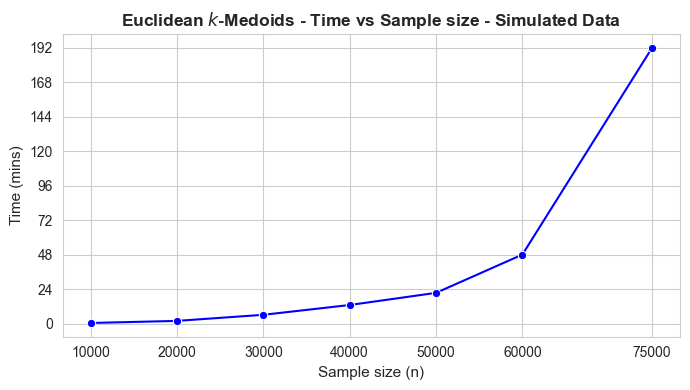

In [8]:
times_values = np.array(list(times.values()))
times_values = times_values / 60 # to minutes
fig, ax = plt.subplots(figsize=(7,4))
ax = sns.lineplot(x=sample_sizes, y=times_values, color='blue', marker='o', markersize=6)
ax.set_ylabel('Time (mins)', size=11)
ax.set_xlabel('Sample size (n)', size=11)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
ax.set_xticks(sample_sizes)
ax.set_yticks(np.round(np.linspace(np.min(times_values), np.max(times_values), 9), 0))
plt.title("Euclidean $k$-Medoids - Time vs Sample size - Simulated Data", fontsize=12.5, weight='bold')
plt.tight_layout()
plt.show()

file_name = 'plots/kmedoids_slow'
fig.savefig(file_name + '.jpg', format='jpg', dpi=500)